In [1]:
import tensorflow as tf

In [2]:
import keras

In [3]:
from keras.datasets import cifar100

In [4]:
from keras.utils import to_categorical

In [5]:
(train_X, train_Y_),(test_X, test_Y_) = cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


In [6]:
train_Y = to_categorical(train_Y_)
test_Y = to_categorical(test_Y_)

In [7]:
train_X = train_X.astype('float32')/255
test_X = test_X.astype('float32')/255

In [8]:
from keras.models import Sequential

In [9]:
from keras.layers import  Conv2D, Dense, BatchNormalization, Flatten, MaxPool2D, Input

In [10]:
def create_VGG16_Network():
  model = Sequential()
  model.add(Input(shape = (32,32,3)))
  model.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 16, kernel_size=(3,3), activation = 'relu',padding = 'same', bias_regularizer='l2'))
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 32, kernel_size=(3,3),activation='relu', padding= 'same', bias_regularizer='l2'))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 64, kernel_size= (3,3),  activation = 'relu',padding = 'same', bias_regularizer='l2'))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 128, kernel_size= (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 128, kernel_size= (3,3),  activation = 'relu',padding = 'same', bias_regularizer='l2'))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Flatten())
  model.add(Dense(units = 256, activation = 'relu', bias_regularizer = 'l2'))
  model.add(Dense(units = 256,activation='relu', bias_regularizer='l2'))
  model.add(Dense(units = 100, activation = 'softmax'))
  return model

In [11]:
model  = create_VGG16_Network()

In [12]:
from google.colab import drive

In [13]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
path = F'/content/gdrive/My Drive/Weights/VGG16_RMSProp_BatchNormalization.h5'

In [15]:
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50)
modelCheckpoint = keras.callbacks.ModelCheckpoint(filepath = path, monitor = 'val_accuracy', save_best_only= True, save_weights_only= True, mode = 'auto' )
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
history = model.fit(x = train_X, y = train_Y, batch_size = 32, epochs = 200, validation_split=0.1, callbacks=[modelCheckpoint, earlyStopping])

Epoch 1/200
1407/1407 [==============================] - 14s 10ms/step - loss: 4.2274 - accuracy: 0.0416 - val_loss: 4.3325 - val_accuracy: 0.0474
Epoch 2/200
1407/1407 [==============================] - 13s 10ms/step - loss: 3.9121 - accuracy: 0.0778 - val_loss: 4.0543 - val_accuracy: 0.0794
Epoch 3/200
1407/1407 [==============================] - 13s 9ms/step - loss: 3.7174 - accuracy: 0.1070 - val_loss: 4.1239 - val_accuracy: 0.0726
Epoch 4/200
1407/1407 [==============================] - 14s 10ms/step - loss: 3.5438 - accuracy: 0.1339 - val_loss: 3.8349 - val_accuracy: 0.1050
Epoch 5/200
1407/1407 [==============================] - 13s 9ms/step - loss: 3.4235 - accuracy: 0.1542 - val_loss: 3.9919 - val_accuracy: 0.1016
Epoch 6/200
1407/1407 [==============================] - 14s 10ms/step - loss: 3.2832 - accuracy: 0.1763 - val_loss: 3.7043 - val_accuracy: 0.1400
Epoch 7/200
1407/1407 [==============================] - 13s 9ms/step - loss: 3.1400 - accuracy: 0.2056 - val_loss: 4.15

In [18]:
model.load_weights('/content/gdrive/My Drive/Weights/VGG16_RMSProp_BatchNormalization.h5')

In [19]:
y_pred  = model.predict(test_X)

In [20]:
y_pred = y_pred.argmax(-1)

In [21]:
y_true = test_Y.argmax(-1)

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [23]:
def get_all_metrics(y_pred, y_true):
  precision = precision_score(y_true,y_pred, average = 'weighted')
  recall = recall_score(y_true , y_pred, average= 'weighted')
  accuracy = accuracy_score(y_true, y_pred)
  return precision, recall, accuracy

In [24]:
prec, recall, accuracy = get_all_metrics(y_pred, y_true)

In [25]:
print('Precision:', prec)

Precision: 0.37109896439479856


In [26]:
print('Recall', recall)

Recall 0.343


In [27]:
print('Accuracy', accuracy)

Accuracy 0.343


In [28]:
import pandas as pd

In [29]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [30]:
pd.crosstab(y_pred, y_true, colnames = ['y_predicted'], rownames = ['y_true'])

y_predicted,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
y_true,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,67,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,3,1,0,0,0,0,1,1
1,0,29,1,0,1,1,0,0,0,0,1,0,1,0,6,0,0,0,4,0,0,0,1,0,0,0,1,0,0,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,5,0,1,3,1,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,2,2,5,0,0,0,0,0,0
2,1,0,23,0,0,1,0,1,0,0,2,14,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3,0,1,10,4,0,0,0,3,0,0,0,0,2,3,0,0,0,0,1,0,2,3,0,0,2,0,0,0,1,1,0,0,3,0,0,0,0,2,0,3,0,2,0,0,3,1,0,0,0,0,3,4,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0
3,0,0,0,22,8,0,0,1,1,0,0,0,0,0,0,5,0,0,0,5,1,11,0,0,0,1,1,3,0,4,0,12,1,0,1,0,1,1,10,0,0,0,2,4,1,0,2,0,0,0,4,2,0,0,0,8,0,0,0,2,0,0,0,11,5,4,6,1,0,1,0,0,6,0,3,4,0,0,0,3,8,0,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0,7,1,0
4,0,0,0,4,16,0,1,1,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,1,1,0,1,0,2,1,0,1,0,0,1,2,0,0,0,3,2,2,1,0,0,0,0,3,2,0,0,0,5,0,0,0,0,0,0,0,6,2,3,2,0,0,0,0,0,2,0,7,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,6,0,0,0,1,0,0
5,2,4,1,0,0,37,0,0,1,1,1,1,2,3,0,0,0,0,2,0,7,0,2,0,0,13,2,1,1,0,0,0,0,0,0,2,3,1,0,1,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,10,1,1,8,1,0,0,5,1,0,2,0,1,0,1,1
6,0,1,0,0,0,0,22,0,0,0,0,0,0,0,4,0,0,0,2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,1,0,1,0,0,0,0,0,1,0,0,0,2,1,0,0,0,0,0,0
7,0,0,0,0,0,0,1,31,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,3,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,2,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,52,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,4,0,1,2,1,0,14,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4,0,0,1,0,0,0,0,0,0,0,0,1,4,2,0,0,0,0,0,1,1,1,3,0,0,0,0,0,0,0,0,0,0


In [32]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


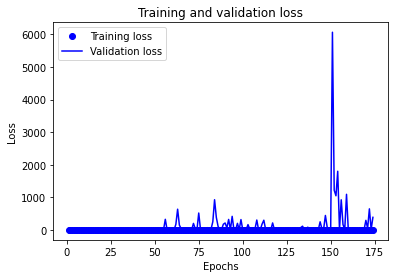

In [33]:
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()